<a href="https://colab.research.google.com/github/tiara070403/skripsi/blob/main/skripsi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install Sastrawi
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

# Import libraries
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import pipeline


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('/content/crawling.csv', index_col=0)
df.head()

,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
conversation_id_str,,,,,,,,,,,,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,2,lucu banget mahasiswa pencinta alam ini,1858070162362204643,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/185807016236220...,1716269490936360960,NaN
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,0,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,1846529554657239219,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/184652955465723...,2544978158,NaN
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,0,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,1844014639350452258,NaN,Leonita_Lestari,in,NaN,0,0,0,https://x.com/undefined/status/184401463935045...,1810821796767375360,NaN
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1836014724523458593,https://pbs.twimg.com/media/GXrVp2Wa0AAv3zG.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183601472452345...,297204645,NaN
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1835164951125917967,https://pbs.twimg.com/media/GXfQzAtacAAlymL.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183516495112591...,297204645,NaN


In [3]:
df = df[['created_at', 'full_text']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5349 entries, 1858070162362204643 to 1230765438897815552
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  5349 non-null   object
 1   full_text   5349 non-null   object
dtypes: object(2)
memory usage: 125.4+ KB


In [5]:
df = df.drop_duplicates(subset=['full_text'])

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

,0
created_at,0
full_text,0


In [9]:
df.isnull().sum()

,0
created_at,0
full_text,0


In [10]:
# Case Folding
df['full_text'] = df['full_text'].str.lower()
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi 'genjot...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@leonita_lestari ada perkoempoelan pentjinta a...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi #betheh...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [11]:
# Cleaning
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [12]:
# Normalisasi Data
norm = {'kekekekegiatanananan':'kegiatan', 'press release': 'siaran pers', 'ukamu': 'unit kegiatan mahasiswa', 'giat': 'kegiatan', 'luring': 'luring', 'sekre': 'sekretariat', 'mapala': 'mahasiswa pencinta alam', 'kocak': 'lucu', 'enak': 'enak', 'bilang': 'bilang', 'sowan': 'mengunjungi', 'buka': 'membuka', 'sampai': 'hingga', 'pukul': 'jam', 'sd': 'sampai', 'kapan': 'kapan', 'mau': 'ingin', 'join': 'bergabung', 'sama': 'bersama', 'bisa': 'dapat', 'bantu': 'membantu', 'kamu': 'kamu', 'sama': 'bersama', 'bisa': 'dapat', 'sama': 'bersama', ' mikir2 ':' mikir ', 'perkoempoelan':'perkumpulan', 'sowan':'menghadap', 'genjot':'menyerang', 'wkwkw':'hahaha', 'gtgtgt':'.', 'th':'tahun', 'ukamu':'ukm', 'bejat':'rusak', 'pentjinta':'pencinta', 'pecinta':'pencinta', ' siaaapp ':' siap ', 'okaaay ':'oke ', 'udh ':'sudah ','ga ':'tidak ',' gaskeun':' ayo ', 'wowww ':'wow ', ' haaayyuukkk ':' ayo ', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,rusak mahasiswa pencinta alam di jambi menyera...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,ada perkumpulan pencinta alam yang lahir tahun...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,siaran pers menghadap ukamu ke ukamu unit pand...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,siaran pers menghadap ukamu ke ukamu unit pand...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini dapat menjadi untuk ...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [13]:
# Stopwords Removal
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['anjayyy']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,rusak mahasiswa pencinta alam jambi menyerang ...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,perkumpulan pencinta alam lahir tahun 1953 did...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,siaran pers menghadap ukamu ukamu unit pandu l...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,siaran pers menghadap ukamu ukamu unit pandu l...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,orang dunia dapat menjadi lingkungan sekitarny...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [14]:
# Tokenisasi
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
conversation_id_str,
1858070162362204643,"[lucu, banget, mahasiswa, pencinta, alam]"
1846529554657239219,"[rusak, mahasiswa, pencinta, alam, jambi, meny..."
1467691301155979267,"[perkumpulan, pencinta, alam, lahir, tahun, 19..."
1836014724523458593,"[siaran, pers, menghadap, ukamu, ukamu, unit, ..."
1835164951125917967,"[siaran, pers, menghadap, ukamu, ukamu, unit, ..."
...,...
1230768955653967873,"[orang, dunia, dapat, menjadi, lingkungan, sek..."
1230767649816100868,"[kapolri, pelestarian, lingkungan, merupakan, ..."
1230765718263586818,"[pelestarian, lingkungan, merupakan, tanggung,..."


In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(full_text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in full_text:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
data_clean = pd.read_csv('/content/preprocessing.csv', encoding='latin1')


lucu banget mahasiswa cinta alam
rusak mahasiswa cinta alam jambi serang paksa teman kampus rekam
kumpul cinta alam lahir tahun 1953 diri awibowo jutidak terbit majalah cinta alam sehingtidak istilah cinta alam familiar masyarakat jauh soe hok gie diri mahasiswa cinta alam univ indonesia
siar pers hadap ukamu ukamu unit pandu lingkung mahasiswa cinta alam halo gensoed langsung kekegiatanan menteri negeri bem unsoed hadap upl mpa jumat 13 september 2024 jam 1900 2050 wib luring sekretariat upl mpa
siar pers hadap ukamu ukamu unit pandu lingkung mahasiswa cinta alam halo gensoed langsung kekegiatanan menteri negeri bem unsoed hadap upl mpa jumat 13 september 2024 jam 1900 2050 wib luring sekretariat upl mpa


KeyboardInterrupt: 

In [24]:
df = pd.read_csv('/content/preprocessing.csv')
df

,full_text
0,lucu banget mahasiswa cinta alam
1,rusak mahasiswa cinta alam jambi serang paksa ...
2,kumpul cinta alam lahir tahun 1953 diri awibow...
3,siar pers hadap ukamu ukamu unit pandu lingkun...
4,mahasiswa cinta alam mahasiswa cinta alam maca...
...,...
4757,betul lestari lingkung tanggung jawab semua
4758,lestari lingkung rupa tanggung jawab moral sama
4759,orang dunia dapat jadi lingkung sekitar terap ...
4760,kapolri lestari lingkung rupa tanggung jawab m...


In [ ]:
# Labeling
import pandas as pd
classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")


def prediksi_sentimen(teks):
    hasil = classifier(teks)

    return hasil[0]['label']

df['sentimen'] = df['full_text'].apply(prediksi_sentimen)

Device set to use cpu


In [ ]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

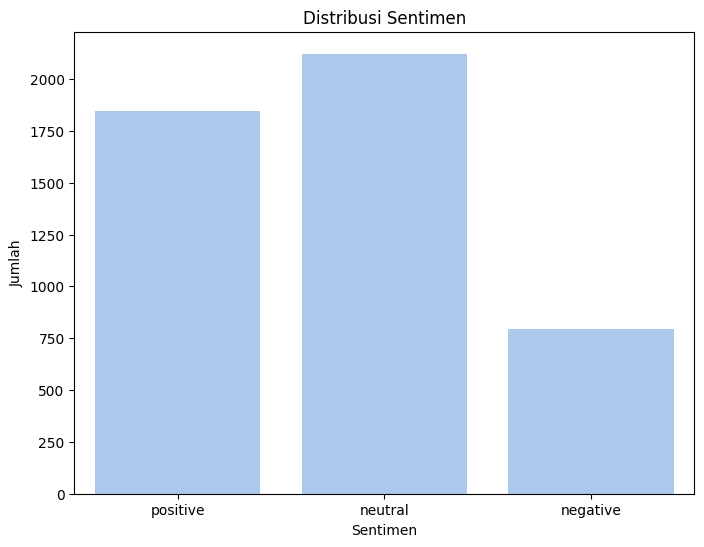

In [27]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [28]:
data_negatif = df[df['sentimen'] == 'negative']
data_positif = df[df['sentimen'] == 'positive']
data_netral = df[df['sentimen'] == 'neutral']

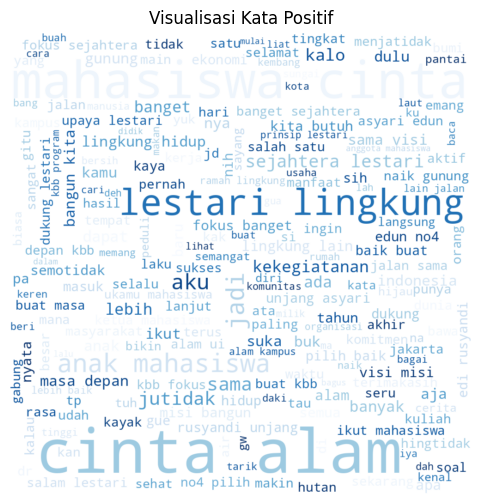

In [29]:
all_text_s1 = ' '.join(word for word in data_positif["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

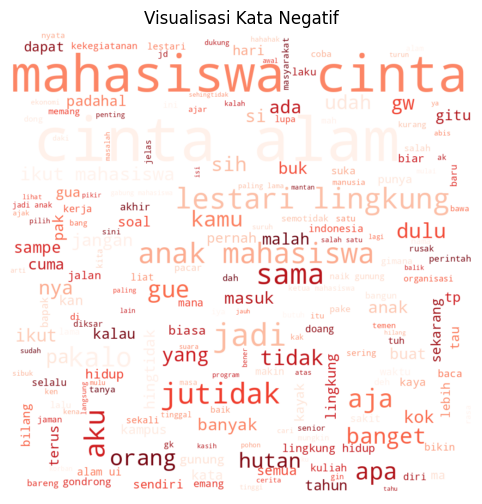

In [30]:
all_text_s0 = ' '.join(word for word in data_negatif["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

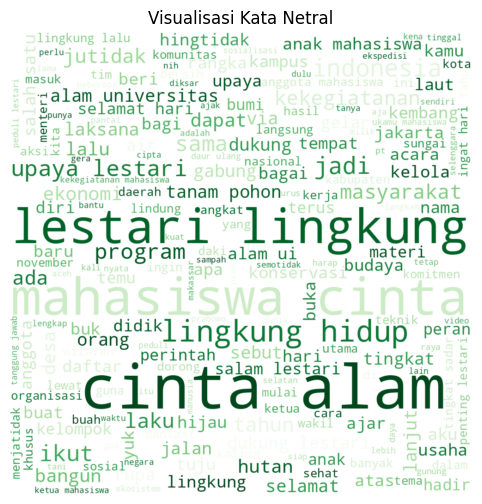

In [31]:
all_text_s2 = ' '.join(word for word in data_netral["full_text"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

In [34]:
X=df.full_text
y=df.sentimen

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 3809
Banyak data x_test  : 953
Banyak data y_train : 3809
Banyak data y_test  : 953


In [43]:
# TRAINING DATA
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [38]:
from sklearn.naive_bayes import MultinomialNB

clf1 = MultinomialNB()

In [39]:
model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [40]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [41]:
hasil1=model1.predict(x_test)

In [42]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.50      0.01      0.01       174
     neutral       0.70      0.81      0.75       406
    positive       0.57      0.73      0.64       373

    accuracy                           0.63       953
   macro avg       0.59      0.52      0.47       953
weighted avg       0.61      0.63      0.57       953



In [44]:
# TESTING
def classify_text(input_text):
    models = [
        ('MultinomialNB', model_multinomialNaiveBayes)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [45]:
model_multinomialNaiveBayes = model1.fit(x_train, y_train)

In [46]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: jahat
Input kata : jahat

Hasil Klasifikasi:
MultinomialNB: neutral
